In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv", header=None, names=["x1","x2","y"])
X = data[["x1","x2"]].to_numpy()
y = data["y"].to_numpy()
del data

In [2]:
def plot_wrapper(X, yhat, model, plot_values=True, plot_boundary=True, legend=True, title=None):
    weights = [model.intercept_[0]] + model.coef_.tolist()[0]

    sns.set(rc={'figure.figsize':(14,6)})
    if plot_values:
        ax = sns.scatterplot(x=X[:,0], y=X[:,1], hue=m.predict(X), palette="flare")
        h,_ = ax.get_legend_handles_labels()
    
    if plot_boundary:
        decision_boundary = []
        for i in np.linspace(np.amin(X[:,:1]),np.amax(X[:,:1])):
            slope = -(weights[0]/weights[2])/(weights[0]/weights[1])  
            intercept = -weights[0]/weights[2]
            z = (slope*i) + intercept
            decision_boundary.append((i,z))
        decision_boundary = np.array(decision_boundary)

        line = plt.plot(decision_boundary[:,0], decision_boundary[:,1], linewidth=2)
        line[0].set_linestyle("--")
        line[0].set_color("red")
    
    if title:
        plt.title(title, fontsize=16)
    if legend:
        if plot_values and plot_boundary:
            plt.legend([line[0],h[1],h[0]],["decision boundary","1","-1"], loc=4, fontsize="large")
        elif plot_boundary:
            plt.legend([line[0]],["decision boundary"], loc=4, fontsize="large")
        elif plot_values:
            plt.legend([h[1],h[0]],["1","-1"], loc=4, fontsize="large")

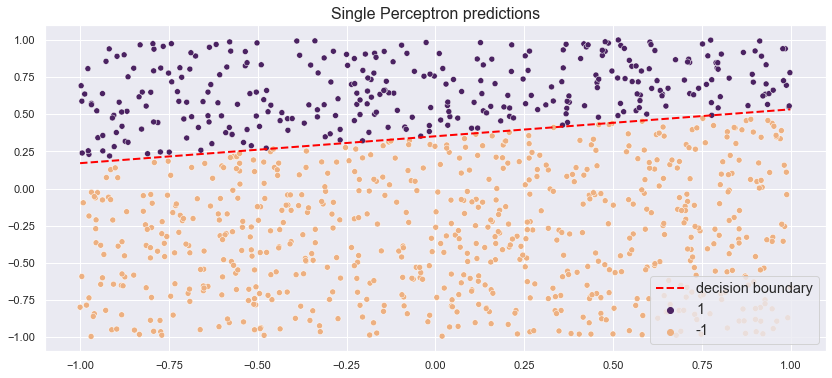

In [3]:
from sklearn.linear_model import Perceptron

m = Perceptron()
m.fit(X,y)
yhat = m.predict(X)

plot_wrapper(X, yhat, m, title="Single Perceptron predictions")